# Data Mining Portfolio  
## Telecom Customer Churn Prediction  

## Project Overview

This project investigates customer churn within a telecom context using a publicly available dataset. The objective is to develop and evaluate predictive models that identify customers at risk of leaving, enabling more targeted and cost-effective retention strategies.


## Stage 1: Problem Definition and Data Scoping

### Business Problem

Customer churn is a significant challenge for telecom service providers, as acquiring new customers is typically more costly than retaining existing ones. UK telecom operators such as Three UK, EE, and Vodafone operate in a highly competitive market where customers can switch providers easily due to short-term contracts and similar pricing structures. As a result, the ability to identify customers who are at risk of leaving is critical for improving customer retention and protecting recurring revenue.

### Data Mining Objective

The objective of this project is to develop a predictive model that can identify customers who are likely to churn based on their historical service usage, contract details, and billing information. This is framed as a binary classification problem, where the output variable indicates whether a customer churns or remains with the service.

### Dataset Selection and Justification

This study uses a publicly available telecom customer churn dataset sourced from Kaggle, originally provided by IBM. The dataset contains detailed customer-level information including tenure, contract type, monthly charges, payment method, subscribed services, and a churn indicator. Although the dataset does not originate from a specific UK provider, it closely reflects the characteristics of customers in the UK telecom sector and is widely used for churn prediction research. The dataset is therefore appropriate for demonstrating data mining techniques and evaluating predictive performance, while acknowledging that real-world deployment would require operator-specific data.

## Stage 2: Exploratory Data Analysis and Pre-processing

### Data Overview

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

df = pd.read_csv("../data/telecom_churn.csv")

display(df.head())
print(df.shape)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


(7043, 21)


The dataset contains 7,043 customer records with 21 variables. Displaying the
first five rows provides an overview of the structure and types of variables
present in the data.

### Data Types and Structure

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Most variables in the dataset are categorical, representing customer
demographics, service subscriptions, and contract details. Numerical variables
include tenure, MonthlyCharges, and TotalCharges. TotalCharges has been
successfully converted to a numeric format, enabling its use in subsequent
modelling.

### Churn Distribution

In [3]:
df["Churn"].value_counts()
df["Churn"].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

Approximately 26.5% of customers in the dataset have churned, indicating a
moderate class imbalance. This suggests that evaluation metrics beyond simple
accuracy may be required during model assessment.

### Missing Values and Data Cleaning

In [4]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
df = df.dropna()
df.shape

(7032, 21)

After converting TotalCharges to a numeric format, 11 records containing missing
values were removed. This resulted in a final dataset of 7,032 records, which
remains sufficient for data mining analysis.

### Churn Distribution Visualisation

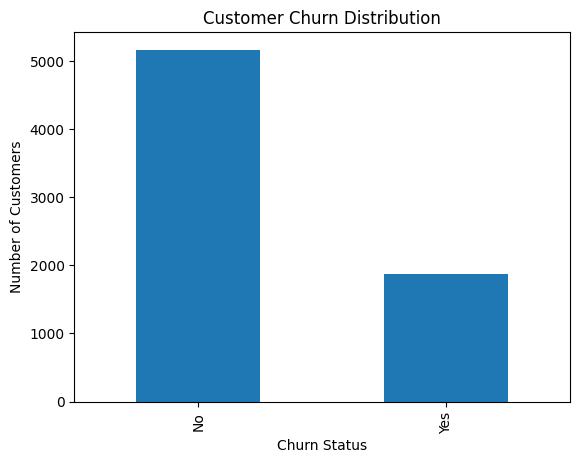

In [7]:
import matplotlib.pyplot as plt

df["Churn"].value_counts().plot(kind="bar")
plt.title("Customer Churn Distribution")
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")
plt.show()

The bar chart illustrates that the majority of customers did not churn, while
approximately one quarter of customers left the service. This visual
representation confirms the moderate class imbalance identified earlier and
highlights the importance of selecting appropriate evaluation metrics during
model development.

### Initial Churn Insights

In [6]:
df.groupby("Churn")["tenure"].mean()

Churn
No     37.650010
Yes    17.979133
Name: tenure, dtype: float64

Customers who churn have a significantly lower average tenure compared to
non-churning customers. This suggests that newer customers are at higher risk
of churn, highlighting an important factor for retention strategies.

### Tenure Distribution by Churn Status

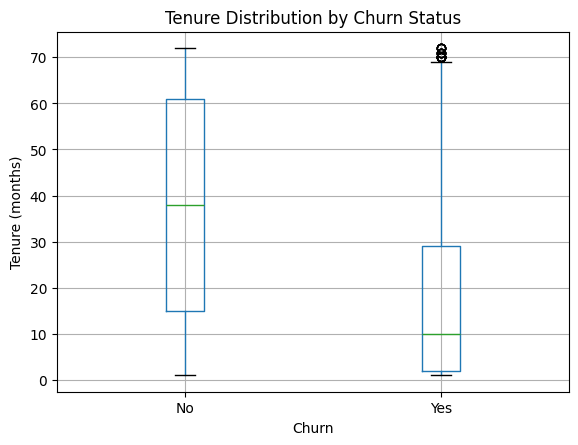

In [8]:
df.boxplot(column="tenure", by="Churn")
plt.title("Tenure Distribution by Churn Status")
plt.suptitle("")
plt.xlabel("Churn")
plt.ylabel("Tenure (months)")
plt.show()

The boxplot shows that customers who churn tend to have significantly lower
tenure compared to those who remain with the provider. This suggests that newer
customers are at higher risk of churn, indicating a potential focus area for
early-stage retention strategies.

## Stage 3: Data Mining / Machine Learning
- Technique(s) used
- Justification
- Model training and validation

Step 3.1 — Define target (y) and features (X)

In [9]:
# Define target variable
y = df["Churn"]

# Define feature set (drop target)
X = df.drop("Churn", axis=1)

X.shape, y.shape

((7032, 20), (7032,))

Step 3.2 — Convert target variable to numeric

In [10]:
# Convert Churn to binary
y = y.map({"Yes": 1, "No": 0})

y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

Step 3.3 — Drop non-predictive identifier

In [11]:
# Drop customerID
X = X.drop("customerID", axis=1)

X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

Step 3.4 — Encode categorical variables

In [12]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded.shape

(7032, 30)

Step 3.5 — Final sanity check

In [13]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender_Male                            7032 non-null   bool   
 5   Partner_Yes                            7032 non-null   bool   
 6   Dependents_Yes                         7032 non-null   bool   
 7   PhoneService_Yes                       7032 non-null   bool   
 8   MultipleLines_No phone service         7032 non-null   bool   
 9   MultipleLines_Yes                      7032 non-null   bool   
 10  InternetService_Fiber optic            7032 non-null   bool   
 11  InternetS

Following the exploratory analysis and data quality checks performed in Stage 2,
the dataset was prepared for machine learning. The target variable (Churn) was
converted to a binary format, non-predictive identifiers were removed, and
categorical variables were encoded using one-hot encoding. This ensured that
all features were in a suitable numeric format for classification models.

Step 3.6 — Train/test split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 30), (1407, 30), (5625,), (1407,))

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Step 3.7 — Baseline model: Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=2000)

log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

In [17]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]
print("\nROC-AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.8038379530916845

Confusion Matrix:
 [[916 117]
 [159 215]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407


ROC-AUC: 0.8356727976766699


A Logistic Regression model was trained using an 80/20 train-test split with
stratification to preserve the original churn distribution. Model performance
was evaluated using accuracy, a confusion matrix, precision, recall, and ROC-AUC.

The model achieved an overall accuracy of approximately 80%. However, due to the
imbalanced nature of the churn dataset, additional metrics were considered. The
model achieved a recall of 57% for churned customers, indicating that it was able
to correctly identify over half of customers who left the service. Precision for
the churn class was 65%, suggesting a moderate rate of false positive churn
predictions.

The ROC-AUC score of 0.84 indicates good discriminatory power, meaning the model
is effective at ranking customers by churn risk. While the model is more accurate
at identifying non-churning customers, it provides a useful baseline for churn
prediction and could support targeted retention strategies in a real-world
telecom context.

## Model Improvement: Addressing Class Imbalance

The baseline Logistic Regression model achieved strong overall accuracy (≈80%), but demonstrated relatively low recall for churned customers (≈57%). This indicates that a substantial proportion of actual churners were not being correctly identified.

Given that churn prediction is typically used for proactive retention strategies, missing churners may be more costly than incorrectly flagging loyal customers. To address this imbalance, a second Logistic Regression model was implemented using `class_weight="balanced"`, which adjusts the penalty applied to misclassifying the minority class (churn).

This approach aims to improve churn detection performance, even if it reduces overall accuracy, allowing for a more business-aligned evaluation of model effectiveness.

In [18]:
log_reg_balanced = LogisticRegression(
    max_iter=2000,
    class_weight="balanced"
)

log_reg_balanced.fit(X_train_scaled, y_train)

y_pred_balanced = log_reg_balanced.predict(X_test_scaled)
y_prob_balanced = log_reg_balanced.predict_proba(X_test_scaled)[:, 1]

In [19]:
print("Balanced Logistic Regression")

print("Accuracy:", accuracy_score(y_test, y_pred_balanced))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))

print("\nClassification Report:\n", classification_report(y_test, y_pred_balanced))

print("\nROC-AUC:", roc_auc_score(y_test, y_prob_balanced))

Balanced Logistic Regression
Accuracy: 0.7263681592039801

Confusion Matrix:
 [[724 309]
 [ 76 298]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407


ROC-AUC: 0.8349765233911922


## Interpreting Key Drivers of Churn

While predictive performance metrics indicate how well the model classifies churn, they do not explain which factors influence churn behaviour. To extract business insight, the coefficients of the Logistic Regression model are analysed.

In Logistic Regression, positive coefficients indicate factors that increase the likelihood of churn, while negative coefficients indicate factors that reduce churn probability. By ranking coefficients, the most influential churn drivers can be identified.

In [20]:
import pandas as pd

# Create dataframe of feature importance using baseline model
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": log_reg.coef_[0]
})

# Sort features by coefficient value
coefficients_sorted = coefficients.sort_values(by="Coefficient", ascending=False)

coefficients_sorted.head(10)

,Feature,Coefficient
10,InternetService_Fiber optic,0.727745
3,TotalCharges,0.639028
21,StreamingTV_Yes,0.249702
23,StreamingMovies_Yes,0.236368
9,MultipleLines_Yes,0.214359
28,PaymentMethod_Electronic check,0.181473
26,PaperlessBilling_Yes,0.142663
0,SeniorCitizen,0.070792
17,DeviceProtection_Yes,0.068965
29,PaymentMethod_Mailed check,0.033392


In [21]:
coefficients_sorted.tail(10)

,Feature,Coefficient
14,OnlineBackup_No internet service,-0.088138
12,OnlineSecurity_No internet service,-0.088138
20,StreamingTV_No internet service,-0.088138
6,Dependents_Yes,-0.105956
19,TechSupport_Yes,-0.118240
13,OnlineSecurity_Yes,-0.136804
24,Contract_One year,-0.310898
25,Contract_Two year,-0.602591
2,MonthlyCharges,-0.851551
1,tenure,-1.347613


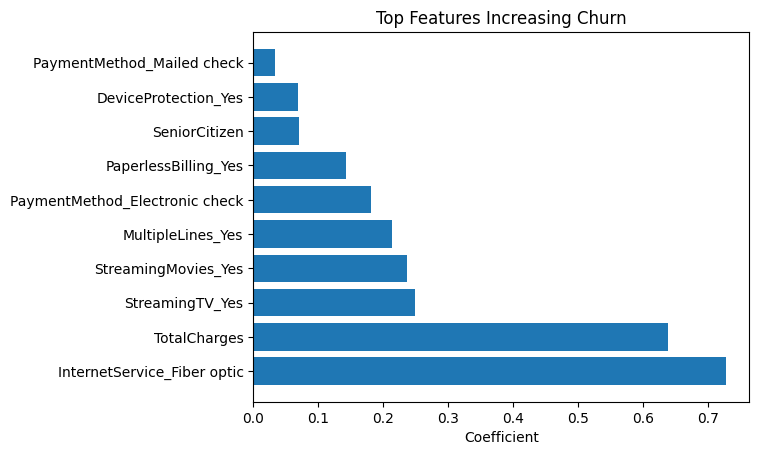

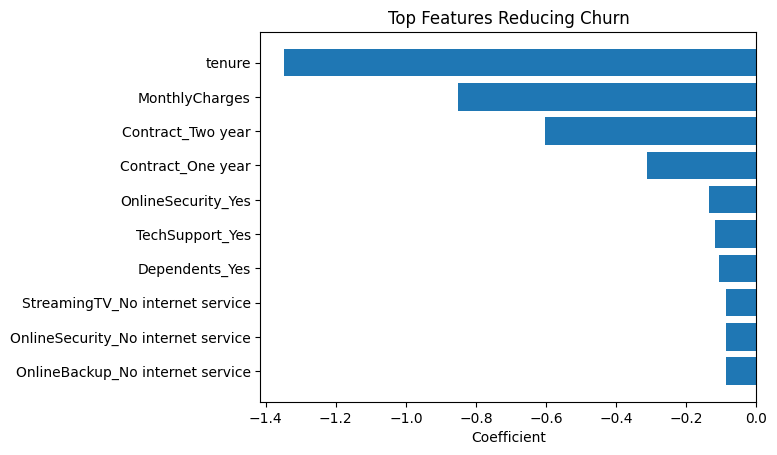

In [22]:
import matplotlib.pyplot as plt

top_positive = coefficients_sorted.head(10)
top_negative = coefficients_sorted.tail(10)

plt.figure()
plt.barh(top_positive["Feature"], top_positive["Coefficient"])
plt.title("Top Features Increasing Churn")
plt.xlabel("Coefficient")
plt.show()

plt.figure()
plt.barh(top_negative["Feature"], top_negative["Coefficient"])
plt.title("Top Features Reducing Churn")
plt.xlabel("Coefficient")
plt.show()

## Key Business Drivers of Churn

Coefficient analysis reveals that tenure is the strongest protective factor against churn, indicating that customer loyalty increases significantly over time. Long-term contracts (one-year and two-year agreements) are also strongly associated with reduced churn risk, suggesting that contractual commitment plays a critical retention role.

Conversely, customers using fibre optic internet and those paying via electronic check demonstrate higher churn likelihood. Higher cumulative charges (TotalCharges) are also positively associated with churn, potentially reflecting financial pressure or dissatisfaction among high-spending customers. Additional services such as streaming subscriptions and multiple lines show moderate positive associations with churn, indicating that bundled service users may be more price-sensitive or more likely to switch providers.

From a business perspective, these findings suggest that early lifecycle customers, fibre optic users, and electronic check payers represent priority segments for proactive retention strategies. Strengthening contract incentives, promoting long-term agreements, and targeting high-risk service segments could reduce overall churn rates.

## Decision Tree Model

To further evaluate model performance and improve interpretability, a Decision Tree classifier was implemented. Unlike Logistic Regression, Decision Trees can capture non-linear relationships and produce rule-based structures, making them useful for extracting clear decision logic for business interpretation.

This model is trained using the same training and test split to ensure fair comparison with previous models.

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_model = DecisionTreeClassifier(
    max_depth=3,
    random_state=42
)

tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [24]:
y_pred_tree = tree_model.predict(X_test)
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

In [25]:
print("Decision Tree")

print("Accuracy:", accuracy_score(y_test, y_pred_tree))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))

print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

print("\nROC-AUC:", roc_auc_score(y_test, y_prob_tree))

Decision Tree
Accuracy: 0.7846481876332623

Confusion Matrix:
 [[955  78]
 [225 149]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1033
           1       0.66      0.40      0.50       374

    accuracy                           0.78      1407
   macro avg       0.73      0.66      0.68      1407
weighted avg       0.77      0.78      0.77      1407


ROC-AUC: 0.8101487800963912


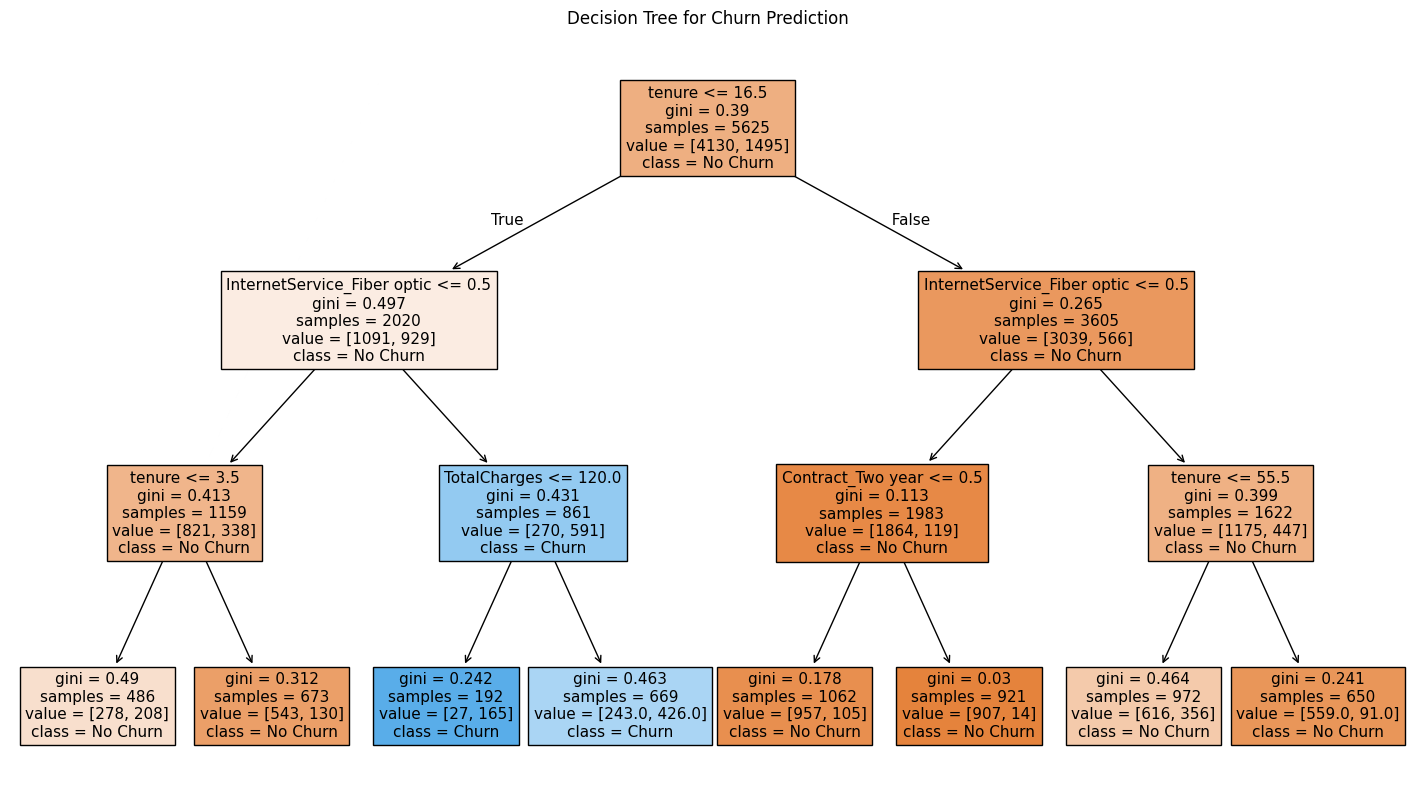

In [26]:
plt.figure(figsize=(18, 10))

plot_tree(
    tree_model,
    feature_names=X_train.columns,
    class_names=["No Churn", "Churn"],
    filled=True,
    fontsize=11
)

plt.title("Decision Tree for Churn Prediction")
plt.show()

## Stage 4: Evaluation, Recommendations, and Reflection
- Model evaluation
- Business implications
- Limitations and future work
- Ethical, privacy, and security considerations


### Model Evaluation Summary

The Logistic Regression model achieved an overall accuracy of approximately 80%,
with a recall of 57% for churned customers and a ROC-AUC score of 0.84. These
results indicate that the model is effective at distinguishing between customers
who are likely to churn and those who are not, although it is more accurate at
identifying non-churning customers. As a baseline model, the results are
reasonable and provide a foundation for further improvement.

### Business Implications and Recommendations

The model’s ability to identify customers at higher risk of churn could support
targeted retention strategies in a telecom context. Rather than treating the
model’s predictions as definitive outcomes, they could be used to prioritise
customers for retention interventions such as discounted contract renewals,
service upgrades, or proactive customer support.

Given the model’s moderate recall for churned customers, it may be most effective
as a risk-ranking tool, allowing businesses to focus resources on customers with
the highest predicted likelihood of churn. This approach could help reduce
customer attrition while minimising unnecessary retention costs.

### Limitations and Future Work

This analysis is subject to several limitations. The dataset used is a publicly
available proxy dataset and does not originate from a specific UK telecom
provider, meaning that results may not fully reflect real-world customer
behaviour. In addition, the model relies on historical customer attributes and
does not incorporate external factors such as competitor pricing or customer
satisfaction metrics.

Future work could explore the use of more advanced models, such as ensemble
methods, to improve churn recall. Further feature engineering and threshold
optimisation could also be applied to better balance false positives and false
negatives. In a real-world setting, ongoing model retraining would be required to
account for changing customer behaviour over time.

### Ethical, Privacy, and Security Considerations

Churn prediction models rely on the analysis of customer data, which raises
important ethical and privacy considerations. In a real-world deployment,
telecom providers would need to ensure compliance with data protection
regulations such as GDPR, including transparency around how customer data is
used and ensuring appropriate consent is obtained.

There is also a risk that automated churn predictions could lead to unfair
treatment of certain customer groups if not carefully monitored. To mitigate
this, predictive models should be used as decision-support tools rather than
fully automated decision-makers, with regular audits to identify potential bias
or unintended impacts.

## References

IBM (2017) Telco Customer Churn Dataset. Available from: https://www.kaggle.com/blastchar/telco-customer-churn [Accessed Day Month Year].